Populating the interactive namespace from numpy and matplotlib


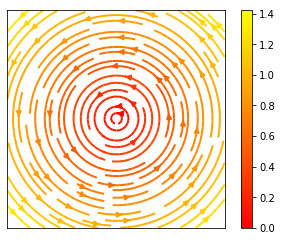

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import logging
LOGGER = logging.getLogger(__name__)

from pynhhd import create_logger
create_logger(logging.INFO)

from utils import drawing, fields

%pylab inline --no-import-all

# -----------------------------------------------------
# create vector field on regular grid

d = 2

dims = (201, 201)         # Y, X
dx = (0.01, 0.01)         # dy, dx

Y, X = np.mgrid[0:dims[0], 0:dims[1]]

vfield = np.zeros((dims[0], dims[1], 2))
vfield = fields.add_criticalPoint2D(vfield, dx, (dims[0]/2, dims[1]/2), 1, 1, 0, 1, 0)

mvf = np.linalg.norm(vfield, axis=2)
LOGGER.info('vf = {}, {}, {}'.format(mvf.shape, mvf.min(), mvf.max()))

#vrng = (0, 7.07106781187)
vrng = (0, mvf.max())

plt.figure()
drawing.draw_slines(X,Y,vfield[:,:,0],vfield[:,:,1],vrng)
plt.xlim([0,dims[1]-1])
plt.ylim([0,dims[0]-1])
plt.show()

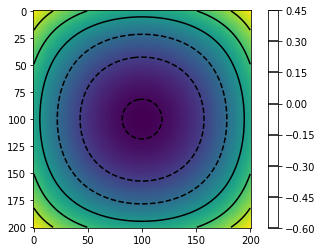

In [4]:
from pynhhd import nHHD

nhhd = nHHD(grid=dims, spacings=dx)
nhhd.decompose(vfield)

plt.figure()
plt.imshow(nhhd.nRu)
CS = plt.contour(numpy.arange(0,nhhd.nRu.shape[1]), numpy.arange(0,nhhd.nRu.shape[0]), nhhd.nRu, colors='k')
plt.colorbar()

plt.show()

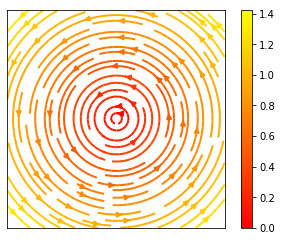

(0, 200)

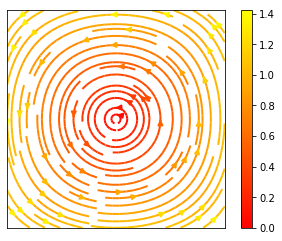

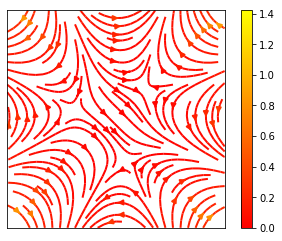

In [5]:
mr = numpy.linalg.norm(nhhd.r, axis=2)
md = numpy.linalg.norm(nhhd.d, axis=2)
mh = numpy.linalg.norm(nhhd.h, axis=2)

LOGGER.info('d = {}, {}, {}'.format(md.shape, md.min(), md.max())) #, numpy.linalg.norm(md)
LOGGER.info('r = {}, {}, {}'.format(mr.shape, mr.min(), mr.max())) #, numpy.linalg.norm(mr)
LOGGER.info('h = {}, {}, {}'.format(mh.shape, mh.min(), mh.max())) #, numpy.linalg.norm(mh)

plt.figure()
drawing.draw_slines(X,Y,vfield[:,:,0],vfield[:,:,1],vrng)
plt.xlim([0,dims[1]-1])
plt.ylim([0,dims[0]-1])
plt.show()

plt.figure()
drawing.draw_slines(X,Y,nhhd.r[:,:,0],nhhd.r[:,:,1],vrng)
plt.xlim([0,dims[1]-1])
plt.ylim([0,dims[0]-1])
#CS = plt.contour(numpy.arange(0,nhhd.nRu.shape[1]), numpy.arange(0,nhhd.nRu.shape[0]), nhhd.nRu, colors='k')

#plt.figure()
#plot_slines(X,Y,nhhd.d,vrng)

plt.figure()
drawing.draw_slines(X,Y,nhhd.h[:,:,0],nhhd.h[:,:,1],vrng)
plt.xlim([0,dims[1]-1])
plt.ylim([0,dims[0]-1])